# Chapter 6 Probability

In [2]:
import random
import math
import matplotlib.pyplot as plt
from collections import Counter

# Here we empirically check the probability that both children are girls(event B) given 
# that at least one of the children is a girl (event L)

# Theoretically we have: P(B|L) = P(B,L)/P(L) = P(B)/P(L) = 1/3
random.seed(0)

def random_kid():
    return random.choice(["boy", "girl"])

In [27]:
if __name__ == "__main__":
    both_girls = 0
    older_girl = 0
    either_girl = 0

    for _ in range(10000):
        younger = random_kid()
        older = random_kid()

        if older == "girl":
            older_girl += 1

        if older == "girl" and younger == "girl":
            both_girls += 1

        if older == "girl" or younger == "girl":
            either_girl += 1

    print('P(both | older) = {:f}'.format(both_girls / older_girl)) # .514 ~ 1/2
    print("P(both | either) = {:f}".format(both_girls / either_girl)) # .341 ~ 1/3

P(both | older) = 0.517214
P(both | either) = 0.344533


## Normal Distribution

In [4]:
### Normal Distribution ###

def normal_pdf(x, mu = 0, sigma = 1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/(2*sigma**2))/(sqrt_two_pi*sigma))

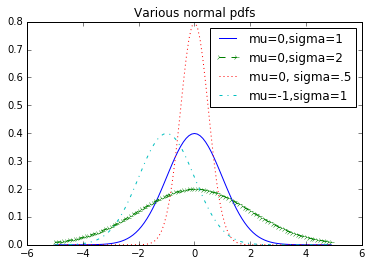

In [5]:
if __name__ == "__main__":
    xs = [x / 10.0 for x in range(-50,50)]
    plt.figure(1)
    plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
    plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '4--', label='mu=0,sigma=2')
    plt.plot(xs, [normal_pdf(x, sigma=.5) for x in xs], ':', label='mu=0, sigma=.5')
    plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
    plt.legend()
    plt.title("Various normal pdfs")
    plt.show()

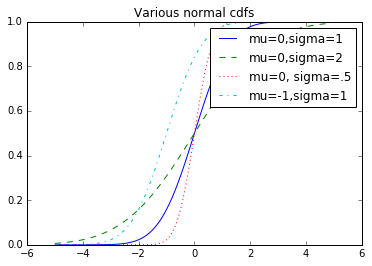

In [28]:
# The normal CDF is not normally expressable in an "elementary" manner, we can 
# use math.erf to compute though


def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu)/(math.sqrt(2) * sigma)))/2

if __name__ == "__main__":
    xs = [x / 10.0 for x in range(-50,50)]
    plt.figure(2)
    plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
    plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
    plt.plot(xs, [normal_cdf(x, sigma=.5) for x in xs], ':', label='mu=0, sigma=.5')
    plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
    plt.legend()
    plt.title("Various normal cdfs")
    plt.show()

In [29]:
# Inverting the cdf algebraically is not nice, but since it is monotonically 
# increasing, we can use binary search 
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance = .00001):
    """find approx inverse value using binary search"""
    
    # If not standard, compute standard and rescale     
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)
        
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (hi_z + low_z) / 2
        mid_p = normal_cdf(mid_z)
        
        if mid_p < p:
            # too low, search higher portion
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # too high, search lower portion
            hi_z, hi_p = mid_z, mid_p
        else:
            break
        
    return mid_z

### Central Limit Theorem

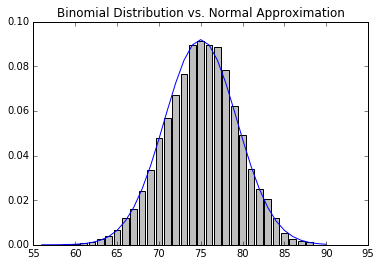

In [30]:
# Essentially, the average of a large number of independent, identically distributed
# variables is approximately normally distributed

def bernoulli_trial(p):
    return 1 if random.random() < p else 0
    
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))
    
def make_hist(p, n, num_points):
    data = [binomial(n,p) for _ in range(num_points)]

    # Use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.figure()
    plt.bar([x-.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p*n
    sigma = math.sqrt(n*p*(1-p))

    # Use a line chart to show the normal approximation
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i+.5,mu,sigma) - normal_cdf(i - .5, mu, sigma) for i in xs]

    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

if __name__ == "__main__":
    make_hist(.75, 100, 10000)